# Задача про пилосос 

### Потсановка задачі

Задано гральне поле розміром (5x5), по якому рухається пилосос. Він може рухатись на одну клітинку вгору, вниз, вліво та вправо. На кожному кроці з ймовірністю 0.5 на будь-якій вільній клітинці з'являється сміття. Задача полягає в тому, щоб мінімізувати кількість клітинок з сміттям після 100-того кроку. Пилосос починає свій рух у верхньому лівому кутку. 

# Реалізація алгоритму

In [92]:
import numpy as np
from IPython.display import clear_output
import time
import seaborn as snb
import copy

class Magic_vacuum_cleaner():
    def __init__(self, n=5, i=100, debug_mode=False, algo=True):
        self.n = n
        self.i = i
        self.debug_mode = debug_mode
        self.f = np.zeros((self.n, self.n),dtype=int)
        self.count_be_field = np.zeros((self.n, self.n),dtype=int)
        self.count_time_dirty_field = np.zeros((self.n, self.n),dtype=int)
        self.prev_xy = (0,0)
        self.xy = (0,0)
        self.f[self.xy] = 5
        self.count_be_field[self.xy] = 1
        self.empty_fields = []
        self.find_empty_fiels()
        self.dirty_fields = []
        self.see_cords = []
        self.blocks_count = [(1,1),(0,2),(0,3),(0,4)]
        self.corner_fields = [(0,0), (4,0), (0,4), (4,4)]
        self.remember_previous_dirty_cords = []
        
        self.desired_way = [(1, 0), (1, 1), (1, 2), (1, 3), (1, 4),(2, 4),(3, 4),(3, 3), (3, 2), (3, 1), (3, 0),(2,0)]
        self.desired_way_2 = [(0,1),(0,2),(0, 3), (1, 3), (2, 3), (3, 3), (4, 3),(4,2),(4, 1), (3, 1), (2, 1), (1, 1)]
        self.variant_of_way = 1
        self.curent_index = 0
        self.direction_on_way = 1
        
        self.algo = algo
        if self.debug_mode:
            if self.algo:
                print('Algo_2')
            else:
                print('Algo_1')
        
    def find_empty_fiels(self):
        for i in range(self.n):
                for j in range(self.n):
                    if self.f[i,j] == 0:
                        self.empty_fields.append((i,j))
                        
    def count_blocks(self):
        self.blocks_count[0] = (self.count_be_field[:3,:3].sum(),1)
        self.blocks_count[1] = (self.count_be_field[:3,2:].sum(),2)
        self.blocks_count[2] = (self.count_be_field[2:,2:].sum(),3)
        self.blocks_count[3] = (self.count_be_field[2:,:3].sum(),4)
                                
    def add_trash(self):
        if np.random.rand() >= 0.5:
            index_pos_trash = np.random.randint(0,len(self.empty_fields))
            position_trash = self.empty_fields[index_pos_trash]
            self.empty_fields.remove(position_trash)
            self.f[position_trash] = 3
            self.dirty_fields.append(position_trash)
            if self.debug_mode:
                print('trash added ',position_trash)
        else:
            if self.debug_mode:
                print('trash NO added')
    
    def generate_see_cords(self):
        x,y = self.xy
        cords = []
        if x+1 <self.n:
            cords.append(((x+1,y),'b'))
        if x-1 >= 0:
            cords.append(((x-1,y),'u'))
        if y+1 <self.n:
            cords.append(((x,y+1),'r'))
        if y-1 >= 0:
            cords.append(((x,y-1),'l'))
        self.see_cords = cords
        
    def choose_cord(self, cords = []):
        res = []
        for cord in cords:
            count = self.count_be_field[cord[0]]
            res.append((count, cord))
        res.sort()
        min_count_value = res[0][0]
        min_cords = []
        for res_cord in res:
            if res_cord[0] == min_count_value:
                min_cords.append(res_cord[1])
        if len(min_cords) == 1:
            if self.debug_mode:
                print('cord_with_min_visit: ',res[0][1])
            return res[0][1][0]
        else:
            return self.choose_in_global_cord(min_cords)
        
    def show_way(self):
        res = np.zeros((self.n, self.n),dtype=int)
        for cord in self.desired_way:
            res[cord] = 5
        for cord in self.desired_way_2:
            res[cord] = 5
        return res
    
    def choose_in_global_cord(self,cords=[]):
        self.count_blocks()
        self.blocks_count.sort()
        min_count_block_value = self.blocks_count[0][0]
        good_blocks = []
        for cord in self.blocks_count:
            if cord[0] == min_count_block_value:
                good_blocks.append(cord)
    
        if self.debug_mode:
            print('blocks_count',self.blocks_count)
            print('good_blocks',good_blocks)
        less_block = self.blocks_count[0][1]
        if len(good_blocks) > 1:
            less_block = good_blocks[np.random.randint(len(good_blocks))][1]
        
        if self.debug_mode:
            print('less_block',less_block)
        better_cords = []
        for cord in cords:
            if less_block == 1:
                if cord[1] in ['u','l']:
                    better_cords.append(cord)
            if less_block == 2:
                if cord[1] in ['u','r']:
                    better_cords.append(cord)
            if less_block == 3:
                if cord[1] in ['b','r']:
                    better_cords.append(cord)
            if less_block == 4:
                if cord[1] in ['b','l']:
                    better_cords.append(cord)
        
        if self.debug_mode:
            print('better_cords ',better_cords)
        
        if len(better_cords) == 1:
            new_cord = better_cords[0]
            if self.debug_mode:
                print('chosen_cord (len=1): ', new_cord)
            return new_cord[0]
        
        if len(better_cords) >= 2:
            new_cord = better_cords[np.random.randint(2)]
            if self.debug_mode:
                print('chosen_cord (len>=2): ', new_cord)
            return new_cord[0]
        if len(better_cords) == 0:
            new_cord = cords[np.random.randint(len(cords))]
            if self.debug_mode:
                print('chosen_cord (len=0): ', new_cord)
            return new_cord[0]
        
                
    def add_dirty_field_points(self):
        for cord in self.dirty_fields:
            self.count_time_dirty_field[cord] += 1
            
    def direction_to_cord(self, goal_cord=(2,2)):
        direction_sign = (goal_cord[0]-self.xy[0], goal_cord[1]-self.xy[1])  #(1,-2)
        good_direction = []
        if direction_sign[0] < 0:
            good_direction.append('u')
        if direction_sign[0] > 0:
            good_direction.append('b')
        if direction_sign[1] > 0:
            good_direction.append('r')
        if direction_sign[1] < 0:
            good_direction.append('l')
            
        cords_to_go = []
        for cord in self.see_cords:
            if cord[1] in good_direction:
                cords_to_go.append(cord)
        return cords_to_go
        
    def find_available_dirty_cords(self):
        available_dirty_cords = []
        
        for cord in self.see_cords:
            if cord[0] in self.dirty_fields:
                available_dirty_cords.append(cord)
                
        if self.debug_mode:
            print('available_dirty_cords', available_dirty_cords)
                
        return available_dirty_cords
    
    def get_next_index(self):
        next_index = self.curent_index + self.direction_on_way
        l = len(self.desired_way)
        if next_index >= l:
            next_index = 0
        if next_index < 0:
            next_index = l-1
        return next_index
    
    def find_next_cord(self):
        good_cords = []
        for cord in self.see_cords:
            if cord[0] != self.prev_xy:
                if cord[0] not in self.corner_fields:
                    good_cords.append(cord)
        if self.debug_mode:
            print('good_cords',good_cords)
        next_cord = self.choose_cord(good_cords)
        return next_cord

    def move(self):
        self.generate_see_cords()
        next_cord = 0
        
        available_dirty_cords = self.find_available_dirty_cords()
                
        len_available_dirty_cords = len(available_dirty_cords)
        if len_available_dirty_cords:
            for cord in available_dirty_cords:
                if cord[0] not in self.remember_previous_dirty_cords:
                    self.remember_previous_dirty_cords.append(cord[0])
            if len_available_dirty_cords >= 2:
                #self.remember_previous_dirty = True
                if self.debug_mode:
                    print('Remember >=2 dirty')
            
            next_cord = self.choose_cord(available_dirty_cords)
            self.dirty_fields.remove(next_cord)
            self.remember_previous_dirty_cords.remove(next_cord)
            
        else:
            next_cord = 0
            if len(self.remember_previous_dirty_cords):
                
                goal_cord = self.remember_previous_dirty_cords[-1]
                good_cords = self.direction_to_cord(goal_cord)
                next_cord = self.choose_cord(good_cords)
                if self.debug_mode:
                    print('Return to remember dirty cord',goal_cord)
                    print('Next cord: next_cord')
                    
            else:
                if self.algo:
                    if self.variant_of_way == 1:
                        if self.xy in self.desired_way:
                            self.curent_index = self.desired_way.index(self.xy)
                            next_index = self.get_next_index()
                            next_cord = self.desired_way[next_index]
                            if self.debug_mode:
                                print('On disired way',next_cord)
                        elif self.xy in self.desired_way_2:
                            self.variant_of_way = 2
                            self.curent_index = self.desired_way_2.index(self.xy)
                            next_index = self.get_next_index()
                            next_cord = self.desired_way_2[next_index]
                            if self.debug_mode:
                                print('On disired way',next_cord)
                                
                        else:
                            next_cord = self.find_next_cord()
                            
                    else:
                        if self.xy in self.desired_way_2:
                            self.curent_index = self.desired_way_2.index(self.xy)
                            next_index = self.get_next_index()
                            next_cord = self.desired_way_2[next_index]
                            if self.debug_mode:
                                print('On disired way',next_cord)
                        elif self.xy in self.desired_way:
                            self.variant_of_way = 1
                            self.curent_index = self.desired_way.index(self.xy)
                            next_index = self.get_next_index()
                            next_cord = self.desired_way[next_index]
                            if self.debug_mode:
                                print('On disired way',next_cord)
                                
                        else:
                            next_cord = self.find_next_cord()
                else:
                    next_cord = self.find_next_cord()
            try:
                self.empty_fields.remove(next_cord)
            except:
                pass
            
        
        self.empty_fields.append(self.xy)
        self.f[self.xy] = 0
        self.prev_xy = self.xy
        
        self.xy = next_cord
        self.f[self.xy] = 5
        
        self.count_be_field[self.xy] += 1
        self.add_dirty_field_points()
        
    
    def start(self):
        for i in range(100):
            clear_output(wait=True)
            self.add_trash()
            self.move()
            for row in self.f:
                print(row)
            time.sleep(0.4)

def show_matr(matr):
    for row in matr:
        print(row)

# Напрямок руху пилососа

<img src='https://doc-04-7o-docs.googleusercontent.com/docs/securesc/of4kiavv5g4gksq5hd31gqp8mgj4vlcm/ph75485g3hr84272vbc73dbagjonl910/1547064000000/03496381133855143961/03496381133855143961/1aFBvbqTHiBMwj6Uzl5YfFTSPStp_AkfV?e=view&nonce=a61g3k3c18q34&user=03496381133855143961&hash=a61ed3v3qost922pvt9g4tobh8i2vh1p'>

Реалізовано директивний рух з пам'яттю. 

## Демонстрація роботи алгоритму за 100 кроків

In [96]:
# Позначення:
#   5 - пилосос
#   3 - сміття

VC = Magic_vacuum_cleaner()
VC.start() 

[0 0 5 0 0]
[0 0 3 0 0]
[0 0 0 0 0]
[0 0 0 0 0]
[0 0 0 0 3]


# Результати

### Отриманий результат для 1000 експериментів

In [106]:
vec_k = []
res_move = np.zeros((5, 5),dtype=int)
res_dirty = np.zeros((5, 5),dtype=int)
for j in range(1000):
    VC = Magic_vacuum_cleaner(algo=True)
    for i in range(100):
        VC.add_trash()
        VC.move()
    k = len(VC.dirty_fields)
    res_move += VC.count_be_field
    res_dirty += VC.count_time_dirty_field
    vec_k.append(k)
mean_k = np.array(vec_k).mean()

print('Для 1000 експерементів в середньому ми отримуємо ',mean_k,' клітинок з сміттям')

Для 1000 експерементів в середньому ми отримуємо  3.967  клітинок з сміттям


## Візуалізація -  які клітинки найчастіше відвідував пилосос

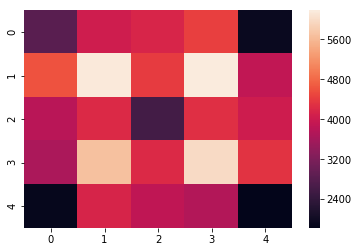

In [107]:
pl = snb.heatmap(res_move)

## Візуалізація де найдовше часу залишалось сміття

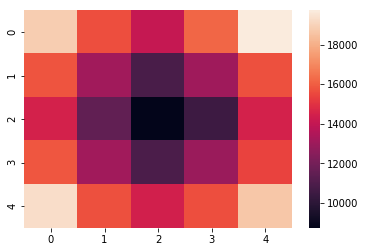

In [108]:
pl = snb.heatmap(res_dirty)